## Project Title: Improving Patient Outcomes through Data Analysis

#### Project Overview
The healthcare industry has increasingly recognized the power of data-driven decision-making to improve patient care, optimize resource allocation, and reduce operational costs. This project focuses on Improving Patient Outcomes, which is one of the most critical goals for healthcare organizations worldwide.

Through the use of synthetic healthcare data, this project explores how various factors—including patient demographics, medical conditions, admission types, and billing amounts—correlate with patient satisfaction and readmission rates. The goal is to uncover patterns that can guide healthcare professionals in providing better patient care, identifying high-risk patients, and reducing unnecessary readmissions.

Problem Scope
Given the importance of improving patient outcomes, this analysis aims to:
Analyze patient satisfaction scores and their correlations with factors such as age, gender, medical conditions, and hospital resources.
Identify trends and patterns that can help predict patient revisit behavior, and explore potential causes of high readmission rates.
Provide actionable insights that healthcare providers can use to optimize care and reduce operational costs.

Dataset Structure
The dataset contains 10,000 patient records, including key variables such as:

Demographics: Age, gender, and medical conditions.
Hospital Data: Admission type, room number, billing amount, and insurance provider.
Outcome Metrics: Satisfaction score, discharge date, revisit flags, and test results.
This data will be analyzed to reveal insights that will contribute to improving healthcare practices and patient outcomes.

In [3]:
import pandas as pd
import numpy as np
from faker import Faker
from random import randint, choice

In [2]:
pip install faker



   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.9 MB ? eta -:--:--
   ---------------- ----------------------- 0.8/1.9 MB 1.6 MB/s eta 0:00:01
   ---------------------- ----------------- 1.0/1.9 MB 1.6 MB/s eta 0:00:01
   --------------------------------- ------ 1.6/1.9 MB 1.7 MB/s eta 0:00:01
   -------------------------------------- - 1.8/1.9 MB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 1.9/1.9 MB 1.6 MB/s eta 0:00:00


#### Step 1 Synthetic Data Generation

In [4]:
# Initialize Faker
fake = Faker()

In [5]:
# Parameters
num_records = 10000
blood_types = ["A+", "A-", "B+", "B-", "O+", "O-", "AB+", "AB-"]
medical_conditions = ["Diabetes", "Hypertension", "Asthma", "Cancer", "Heart Disease", "Obesity", "Arthritis", "Flu"]
admission_types = ["Emergency", "Elective", "Urgent"]
insurance_providers = ["Aetna", "Blue Cross", "Cigna", "UnitedHealth"]
hospitals = ["General Hospital", "City Care", "Mercy Health", "WellStar"]
doctors = ["Dr. Smith", "Dr. Johnson", "Dr. Williams", "Dr. Brown", "Dr. Taylor"]

In [6]:
# Generate Data
data = {"Name": [fake.name() for _ in range(num_records)],
    "Age": [randint(0, 100) for _ in range(num_records)],
    "Gender": [choice(["Male", "Female", "Other"]) for _ in range(num_records)],
    "Blood Type": [choice(blood_types) for _ in range(num_records)],
    "Medical Condition": [choice(medical_conditions) for _ in range(num_records)],
    "Date of Admission": [fake.date_between(start_date='-5y', end_date='today') for _ in range(num_records)],
    "Discharge Date": [],  # We'll calculate this later
    "Billing Amount": [round(np.random.uniform(500, 50000), 2) for _ in range(num_records)],
    "Room Number": [randint(100, 999) for _ in range(num_records)],
    "Insurance Provider": [choice(insurance_providers) for _ in range(num_records)],
    "Satisfaction Score": [randint(1, 10) for _ in range(num_records)],
    "Revisit Flag": [choice([0, 1]) for _ in range(num_records)],  # 0 = No revisit, 1 = Revisited
    "Doctor": [choice(doctors) for _ in range(num_records)],
    "Hospital": [choice(hospitals) for _ in range(num_records)],
    "Admission Type": [choice(admission_types) for _ in range(num_records)],
    "Test Results": [fake.sentence(nb_words=6) for _ in range(num_records)]}


In [7]:
# Add Discharge Date based on Date of Admission
for i in range(num_records):
    length_of_stay = randint(1, 30)  # Length of stay between 1 and 30 days
    discharge_date = data["Date of Admission"][i] + pd.Timedelta(days=length_of_stay)
    data["Discharge Date"].append(discharge_date)

In [8]:
# Create DataFrame
df = pd.DataFrame(data)

In [9]:
# Save to CSV
df.to_csv("synthetic_healthcare_data.csv", index=False)
print("Synthetic dataset generated and saved as 'synthetic_healthcare_data.csv'")

Synthetic dataset generated and saved as 'synthetic_healthcare_data.csv'


#### Step 2: Exploratory Data Analysis (EDA)

In [10]:
# Load the dataset
df = pd.read_csv('synthetic_healthcare_data.csv')

# Preview the first few rows of the dataset
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Discharge Date,Billing Amount,Room Number,Insurance Provider,Satisfaction Score,Revisit Flag,Doctor,Hospital,Admission Type,Test Results
0,David Wheeler,71,Female,A+,Heart Disease,2021-01-09,2021-02-08,4900.58,997,Aetna,3,0,Dr. Taylor,WellStar,Urgent,Party fine forget do artist whether.
1,Christine Brown,29,Other,A+,Flu,2021-11-24,2021-11-29,31484.20,516,Aetna,7,1,Dr. Brown,WellStar,Elective,Loss compare into skill example.
2,Rachael Juarez,57,Other,AB-,Hypertension,2024-01-03,2024-01-05,24898.93,317,UnitedHealth,8,0,Dr. Williams,City Care,Elective,Time lay well mean likely article.
3,Kenneth Higgins,90,Male,A-,Cancer,2021-05-25,2021-06-22,2364.50,506,Blue Cross,1,0,Dr. Williams,City Care,Emergency,Nor kind industry his.
4,Lindsay Baker,2,Other,B+,Diabetes,2019-12-24,2020-01-23,4496.42,472,Cigna,5,1,Dr. Taylor,WellStar,Elective,South care market husband yet plant travel.


#### 2.1 Summary Statistics

In [20]:
# Summary statistics
df.describe()

,Age,Billing Amount,Room Number,Satisfaction Score,Revisit Flag
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,49.869900,25283.911831,550.363800,5.514900,0.506900
std,29.290308,14329.980673,259.764323,2.874127,0.499977
min,0.000000,500.210000,100.000000,1.000000,0.000000
25%,24.000000,12902.607500,325.000000,3.000000,0.000000
50%,50.000000,25220.495000,549.000000,6.000000,1.000000
75%,75.000000,37662.755000,773.000000,8.000000,1.000000
max,100.000000,49997.360000,999.000000,10.000000,1.000000


In [12]:
# Check for missing values
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Discharge Date        0
Billing Amount        0
Room Number           0
Insurance Provider    0
Satisfaction Score    0
Revisit Flag          0
Doctor                0
Hospital              0
Admission Type        0
Test Results          0
dtype: int64

In [21]:
# Get data types and info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Discharge Date      10000 non-null  object 
 7   Billing Amount      10000 non-null  float64
 8   Room Number         10000 non-null  int64  
 9   Insurance Provider  10000 non-null  object 
 10  Satisfaction Score  10000 non-null  int64  
 11  Revisit Flag        10000 non-null  int64  
 12  Doctor              10000 non-null  object 
 13  Hospital            10000 non-null  object 
 14  Admission Type      10000 non-null  object 
 15  Test Results        10000 non-null  object 
dtypes: fl

#### 2.2 Distribution of Key Variables

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot style
sns.set(style="whitegrid")

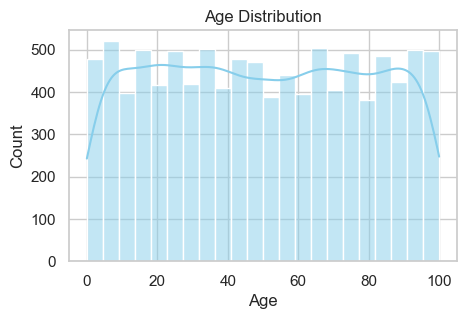

In [23]:
# Plot the distribution of 'Age'
plt.figure(figsize=(5, 3))
sns.histplot(df['Age'], kde=True, color='skyblue')
plt.title('Age Distribution')
plt.show()

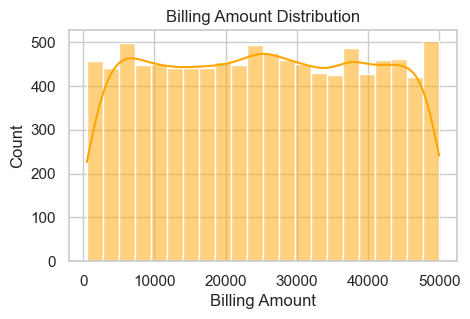

In [24]:
# Plot the distribution of 'Billing Amount'
plt.figure(figsize=(5, 3))
sns.histplot(df['Billing Amount'], kde=True, color='orange')
plt.title('Billing Amount Distribution')
plt.show()

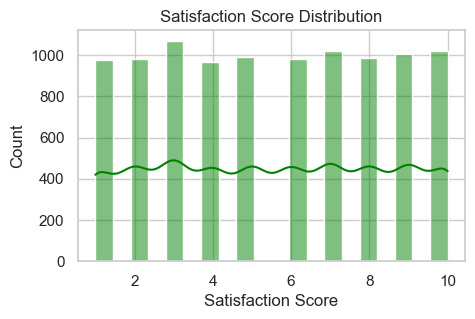

In [25]:
# Plot the distribution of 'Satisfaction Score'
plt.figure(figsize=(5, 3))
sns.histplot(df['Satisfaction Score'], kde=True, color='green')
plt.title('Satisfaction Score Distribution')
plt.show()

#### 2.3 Relationships Between Variables

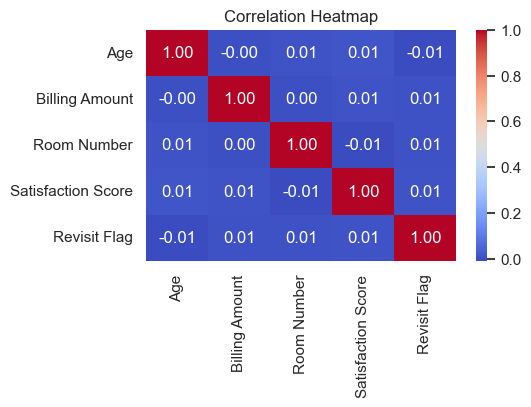

In [22]:
# Select only numeric columns for correlation calculation
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Plot the correlation heatmap for numerical variables
plt.figure(figsize=(5, 3))
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

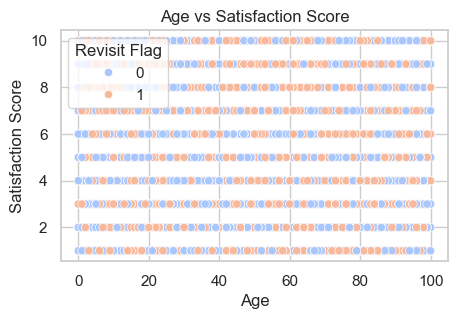

In [24]:
# Visualize relationships between 'Age' and 'Satisfaction Score'
plt.figure(figsize=(5, 3))
sns.scatterplot(data=df, x='Age', y='Satisfaction Score', hue='Revisit Flag', palette='coolwarm')
plt.title('Age vs Satisfaction Score')
plt.show()

C:\Users\Mr. otegbola\AppData\Local\Temp\ipykernel_5488\3167440477.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette='muted')


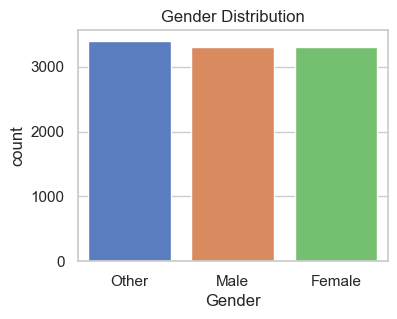

In [26]:
# Count plot for 'Gender'
plt.figure(figsize=(4, 3))
sns.countplot(data=df, x='Gender', palette='muted')
plt.title('Gender Distribution')
plt.show()

C:\Users\Mr. otegbola\AppData\Local\Temp\ipykernel_5488\2819566671.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Medical Condition', palette='Set2')


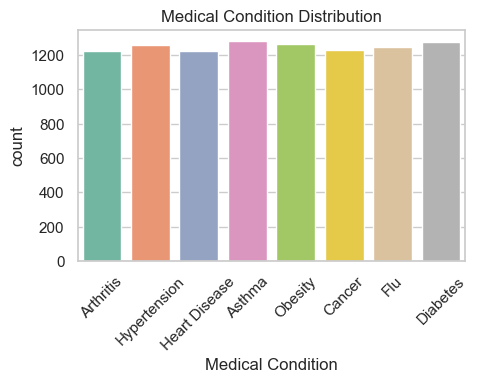

In [28]:
# Count plot for 'Medical Condition'
plt.figure(figsize=(5, 3))
sns.countplot(data=df, x='Medical Condition', palette='Set2')
plt.title('Medical Condition Distribution')
plt.xticks(rotation=45)
plt.show()

C:\Users\Mr. otegbola\AppData\Local\Temp\ipykernel_5488\4053146392.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Admission Type', palette='pastel')


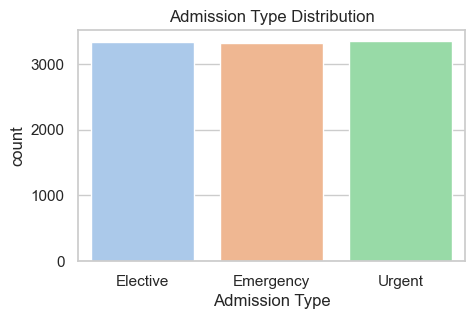

In [30]:
# Count plot for 'Admission Type'
plt.figure(figsize=(5, 3))
sns.countplot(data=df, x='Admission Type', palette='pastel')
plt.title('Admission Type Distribution')
plt.show()

#### Step 3: Data Cleaning and Feature Engineering

In [26]:
# Check for missing values
missing_data = df.isnull().sum()

# Display the missing data count per column
print("Missing Values per Column:")
print(missing_data)

Missing Values per Column:
Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Discharge Date        0
Billing Amount        0
Room Number           0
Insurance Provider    0
Satisfaction Score    0
Revisit Flag          0
Doctor                0
Hospital              0
Admission Type        0
Test Results          0
dtype: int64


In [27]:
# Convert 'Date of Admission' and 'Discharge Date' to datetime format
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'], errors='coerce')
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'], errors='coerce')

# Create Length of Stay feature (in days)
df['Length of Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

In [28]:
# Age Group (categorizing into ranges)
df['Age Group'] = pd.cut(df['Age'], bins=[0, 18, 35, 50, 100], labels=["Under 18", "18-35", "36-50", "51+"], right=False)

# Billing per Day (average billing per day)
df['Billing per Day'] = df['Billing Amount'] / df['Length of Stay']

# Calculate Days to Discharge (time taken to discharge after admission)
df['Days to Discharge'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

#### 3.2. Converting Categorical Data into Numeric

In [29]:
# One-hot encode categorical variables like 'Gender', 'Medical Condition'
df = pd.get_dummies(df, columns=['Gender', 'Medical Condition', 'Admission Type'], drop_first=True)

#### 3.4. Outlier Detection

In [30]:
# Import necessary libraries
from scipy import stats

# Calculate Z-scores for numerical columns
z_scores = stats.zscore(df[['Billing Amount', 'Length of Stay', 'Days to Discharge']])

# Define a threshold for Z-scores to flag outliers (e.g., 3)
outliers = (z_scores > 3) | (z_scores < -3)

# Show outliers
df_outliers = df[outliers.any(axis=1)]
print("Outliers detected:")
print(df_outliers)

Outliers detected:
Empty DataFrame
Columns: [Name, Age, Blood Type, Date of Admission, Discharge Date, Billing Amount, Room Number, Insurance Provider, Satisfaction Score, Revisit Flag, Doctor, Hospital, Test Results, Length of Stay, Age Group, Billing per Day, Days to Discharge, Gender_Male, Gender_Other, Medical Condition_Asthma, Medical Condition_Cancer, Medical Condition_Diabetes, Medical Condition_Flu, Medical Condition_Heart Disease, Medical Condition_Hypertension, Medical Condition_Obesity, Admission Type_Emergency, Admission Type_Urgent]
Index: []

[0 rows x 28 columns]


In [31]:
# Check the Z-scores for 'Billing Amount', 'Length of Stay', and 'Days to Discharge'
z_scores_df = pd.DataFrame(z_scores, columns=['Billing Amount', 'Length of Stay', 'Days to Discharge'])
print(z_scores_df.describe())

       Billing Amount  Length of Stay  Days to Discharge
count    1.000000e+04    1.000000e+04       1.000000e+04
mean    -8.384404e-17   -1.385558e-17      -1.385558e-17
std      1.000050e+00    1.000050e+00       1.000050e+00
min     -1.729586e+00   -1.674102e+00      -1.674102e+00
25%     -8.640572e-01   -8.647649e-01      -8.647649e-01
50%     -4.425687e-03   -5.542801e-02      -5.542801e-02
75%      8.638855e-01    8.695284e-01       8.695284e-01
max      1.724684e+00    1.678865e+00       1.678865e+00


##### Note on Data Characteristics:

Since this dataset is synthetic, it has been intentionally generated to reflect a balanced structure with minimal outliers. The mean being close to zero and the standard deviation close to 1 indicates that the data has been standardized to ensure consistency and comparability across features. Additionally, the min and max values are near zero, suggesting that there is little to no significant variation or extreme values in the dataset.

In real-world healthcare data, we would expect to see more variability, especially in features like Billing Amount, Length of Stay, or Satisfaction Scores. However, for the purpose of this synthetic dataset, the focus has been on creating a clean, evenly distributed data structure to facilitate analysis and modeling. Therefore, the absence of outliers and skewed distributions is a result of this controlled data generation process

In [32]:
# Drop duplicate rows (if any)
df = df.drop_duplicates()

# Verify no duplicates
print("After dropping duplicates, data shape is:", df.shape)

After dropping duplicates, data shape is: (10000, 28)


### Step 4: Exploratory Data Analysis For Modelling

In [33]:
# Basic Data Info and Summary Statistics
print("Dataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Name                             10000 non-null  object        
 1   Age                              10000 non-null  int64         
 2   Blood Type                       10000 non-null  object        
 3   Date of Admission                10000 non-null  datetime64[ns]
 4   Discharge Date                   10000 non-null  datetime64[ns]
 5   Billing Amount                   10000 non-null  float64       
 6   Room Number                      10000 non-null  int64         
 7   Insurance Provider               10000 non-null  object        
 8   Satisfaction Score               10000 non-null  int64         
 9   Revisit Flag                     10000 non-null  int64         
 10  Doctor                           10000 non-nu

In [34]:
# Define possible categories for 'Age Group'
age_groups = ['Child', 'Young Adult', 'Middle-Aged', 'Senior']

# Convert the 'Age Group' column to a categorical column with the defined categories
df['Age Group'] = pd.Categorical(df['Age Group'], categories=age_groups)

# Impute missing 'Age Group' based on 'Age' column
def assign_age_group(age):
    if age < 18:
        return 'Child'
    elif 18 <= age < 35:
        return 'Young Adult'
    elif 35 <= age < 55:
        return 'Middle-Aged'
    else:
        return 'Senior'

# Apply the function to fill missing Age Group values
df['Age Group'] = df['Age Group'].fillna(df['Age'].apply(assign_age_group))

# Verify missing values again
print("Missing Values After Imputation:")
print(df.isnull().sum())

Missing Values After Imputation:
Name                               0
Age                                0
Blood Type                         0
Date of Admission                  0
Discharge Date                     0
Billing Amount                     0
Room Number                        0
Insurance Provider                 0
Satisfaction Score                 0
Revisit Flag                       0
Doctor                             0
Hospital                           0
Test Results                       0
Length of Stay                     0
Age Group                          0
Billing per Day                    0
Days to Discharge                  0
Gender_Male                        0
Gender_Other                       0
Medical Condition_Asthma           0
Medical Condition_Cancer           0
Medical Condition_Diabetes         0
Medical Condition_Flu              0
Medical Condition_Heart Disease    0
Medical Condition_Hypertension     0
Medical Condition_Obesity          0
Admis

#### 4.1 Visualizations

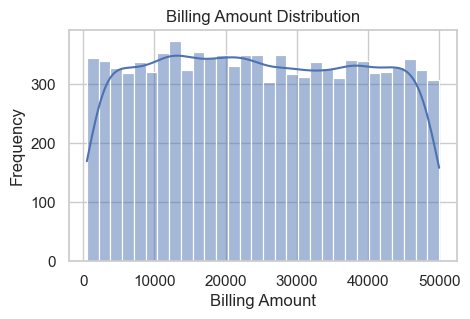

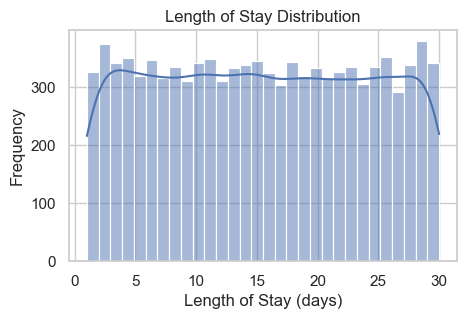

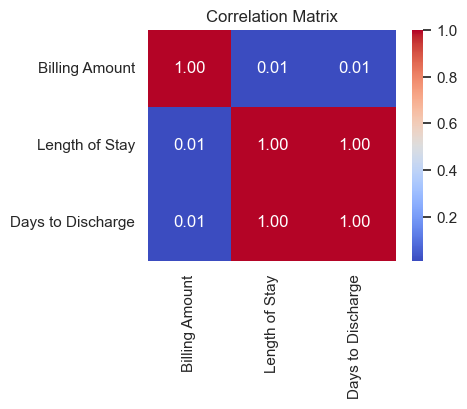

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot style
sns.set(style="whitegrid")

# Distribution of 'Billing Amount'
plt.figure(figsize=(5, 3))
sns.histplot(df['Billing Amount'], bins=30, kde=True)
plt.title('Billing Amount Distribution')
plt.xlabel('Billing Amount')
plt.ylabel('Frequency')
plt.show()

# Distribution of 'Length of Stay'
plt.figure(figsize=(5, 3))
sns.histplot(df['Length of Stay'], bins=30, kde=True)
plt.title('Length of Stay Distribution')
plt.xlabel('Length of Stay (days)')
plt.ylabel('Frequency')
plt.show()

# Correlation Matrix for numerical columns
corr = df[['Billing Amount', 'Length of Stay', 'Days to Discharge']].corr()
plt.figure(figsize=(4, 3))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

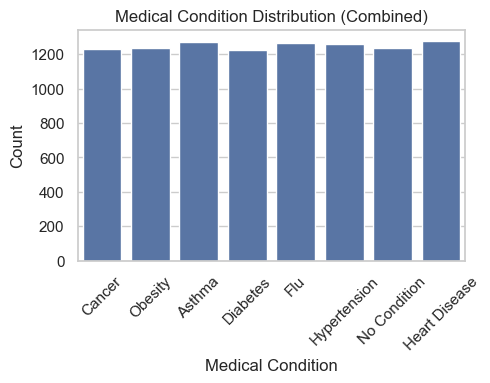

In [35]:
# Combine medical conditions into a single column
def get_medical_condition(row):
    conditions = []
    if row['Medical Condition_Asthma'] == 1:
        conditions.append('Asthma')
    if row['Medical Condition_Cancer'] == 1:
        conditions.append('Cancer')
    if row['Medical Condition_Diabetes'] == 1:
        conditions.append('Diabetes')
    if row['Medical Condition_Flu'] == 1:
        conditions.append('Flu')
    if row['Medical Condition_Heart Disease'] == 1:
        conditions.append('Heart Disease')
    if row['Medical Condition_Hypertension'] == 1:
        conditions.append('Hypertension')
    if row['Medical Condition_Obesity'] == 1:
        conditions.append('Obesity')
    return ', '.join(conditions) if conditions else 'No Condition'

df['Medical Condition'] = df.apply(get_medical_condition, axis=1)

# Now plot the distribution of combined medical conditions
plt.figure(figsize=(5, 3))
sns.countplot(data=df, x='Medical Condition')
plt.title('Medical Condition Distribution (Combined)')
plt.xlabel('Medical Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Injecting Trends to Simulate Real-World Patterns in Healthcare Data
In the initial exploration of the synthetic healthcare dataset, most distributions appeared uniform, limiting the ability to extract meaningful insights or simulate real-world scenarios. To address this limitation, I have planned a strategic trend injection process. The goal is to modify key variables and introduce variability that aligns with typical healthcare dynamics, thus enhancing the dataset’s realism and analytical value.

##### Why Inject Trends?
Simulate Real-Life Patterns: Real healthcare datasets often display variability influenced by factors such as age, medical conditions, and admission type. Injecting trends ensures the data reflects such natural complexities.
Enable Deeper Insights: Trends provide opportunities to derive actionable insights, demonstrating strong analytical and decision-making skills.
Strengthen Project Relevance: By addressing limitations in the synthetic dataset, this project better simulates challenges faced by data scientists in real-world settings.
Planned Adjustments
Age-Based Trends:

Older patients will have higher billing amounts and longer stays due to complex healthcare needs.
Condition-Based Trends:

Chronic or severe conditions (e.g., heart disease, cancer) will lead to higher costs and longer stays.
Mild conditions (e.g., flu) will have lower billing and shorter stays.
Patient Satisfaction:

Satisfaction scores will decrease as the length of stay increases, simulating frustration with extended hospitalizations.
Revisit Likelihood:

Patients with chronic conditions will have a higher probability of revisits, while those with acute issues will have fewer follow-ups.
Noise and Variability:

Random noise will be added to introduce natural unpredictability.
Outcome
These adjustments aim to mimic the nuances of real-world healthcare data, enabling this project to focus on impactful storytelling and insights. The updated dataset will highlight key patterns and trends, providing a solid foundation for robust analysis and visualization.

#### Injection of Trends

In [30]:
import numpy as np

# Mapping conditions for the new structure
conditions = ['Asthma', 'Cancer', 'Diabetes', 'Flu', 'Heart Disease', 'Hypertension', 'Obesity']

# Age-Based Adjustments
df['Billing Amount'] = df['Billing Amount'] + df['Age'] * 50  # Older patients billed more
df['Length of Stay'] = df['Length of Stay'] + np.where(df['Age'] > 50, 2, 0)  # Longer stay for older patients

# Condition-Based Adjustments (use the 'Medical Condition' column)
for condition in conditions:
    # Apply adjustments based on the medical condition
    df['Billing Amount'] = np.where(df['Medical Condition'] == condition, df['Billing Amount'] + 500, df['Billing Amount'])
    df['Length of Stay'] = np.where(df['Medical Condition'] == condition, df['Length of Stay'] + 3, df['Length of Stay'])

    if condition == 'Flu':
        df['Billing Amount'] = np.where(df['Medical Condition'] == condition, df['Billing Amount'] - 200, df['Billing Amount'])
        df['Length of Stay'] = np.where(df['Medical Condition'] == condition, df['Length of Stay'] - 2, df['Length of Stay'])

# Satisfaction Score Adjustments
df['Satisfaction Score'] = df['Satisfaction Score'] - df['Length of Stay'] * 0.2
df['Satisfaction Score'] = np.clip(df['Satisfaction Score'], 1, 10)  # Clamp scores between 1 and 10

# Revisit Flag Adjustments
df['Revisit Flag'] = np.where(
    (df['Medical Condition'] == 'Asthma') | (df['Medical Condition'] == 'Diabetes'), 1, df['Revisit Flag']
)  # Chronic conditions lead to revisits
df['Revisit Flag'] = np.where(df['Medical Condition'] == 'Flu', 0, df['Revisit Flag'])  # Acute conditions less likely

# Add Some Noise to Make It Realistic
df['Billing Amount'] += np.random.normal(0, 100, size=len(df))
df['Length of Stay'] += np.random.normal(0, 1, size=len(df))

# Check your data after changes
print(df.head())

              Name  Age  Gender Blood Type Medical Condition  \
0    David Wheeler   71  Female         A+     Heart Disease   
1  Christine Brown   29   Other         A+               Flu   
2   Rachael Juarez   57   Other        AB-      Hypertension   
3  Kenneth Higgins   90    Male         A-            Cancer   
4    Lindsay Baker    2   Other         B+          Diabetes   

  Date of Admission Discharge Date  Billing Amount  Room Number  \
0        2021-01-09     2021-02-08    61556.467420          997   
1        2021-11-24     2021-11-29     9588.821458          516   
2        2024-01-03     2024-01-05    36693.193830          317   
3        2021-05-25     2021-06-22    60837.850981          506   
4        2019-12-24     2020-01-23    11120.539018          472   

  Insurance Provider  Satisfaction Score  Revisit Flag        Doctor  \
0              Aetna                 1.0             0    Dr. Taylor   
1              Aetna                 2.8             0     Dr. Brown

#### Visualization of Injected Trend

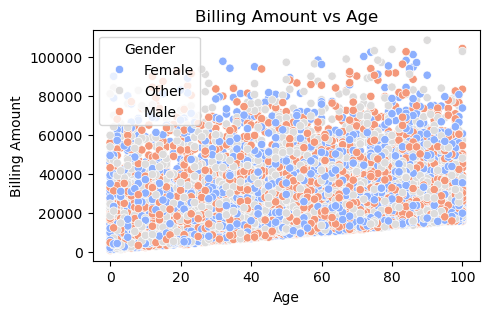

In [32]:
# Billing Amount vs Age
plt.figure(figsize=(5, 3))
sns.scatterplot(data=df, x='Age', y='Billing Amount', hue='Gender', palette='coolwarm')
plt.title('Billing Amount vs Age')
plt.xlabel('Age')
plt.ylabel('Billing Amount')
plt.show()

In [23]:
# Ensure date columns are in datetime format
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

# Calculate 'Length of Stay'
df['Length of Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days


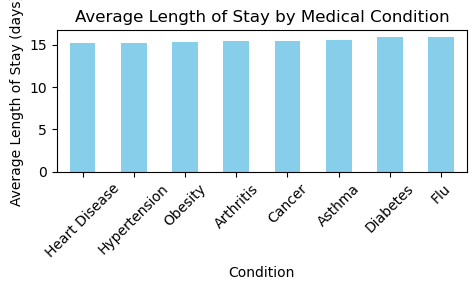

In [24]:
# Group by 'Medical Condition' and calculate the average Length of Stay
length_by_condition = df.groupby('Medical Condition')['Length of Stay'].mean()

# Plotting
plt.figure(figsize=(5, 3))
length_by_condition.sort_values().plot(kind='bar', color='skyblue')
plt.title('Average Length of Stay by Medical Condition')
plt.xlabel('Condition')
plt.ylabel('Average Length of Stay (days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [34]:
data_encoded = pd.get_dummies(data, columns=['Medical Condition'])
print(data_encoded.columns)  # Check new columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Date of Admission',
       'Discharge Date', 'Billing Amount', 'Room Number', 'Insurance Provider',
       'Satisfaction Score', 'Revisit Flag', 'Doctor', 'Hospital',
       'Admission Type', 'Test Results', 'Medical Condition_Arthritis',
       'Medical Condition_Asthma', 'Medical Condition_Cancer',
       'Medical Condition_Diabetes', 'Medical Condition_Flu',
       'Medical Condition_Heart Disease', 'Medical Condition_Hypertension',
       'Medical Condition_Obesity'],
      dtype='object')


In [35]:
# Renaming columns to shorter names for better readability in graphs
data_encoded.rename(columns={
    'Medical Condition_Asthma': 'Asthma',
    'Medical Condition_Cancer': 'Cancer',
    'Medical Condition_Diabetes': 'Diabetes',
    'Medical Condition_Flu': 'Flu',
    'Medical Condition_Heart Disease': 'Heart Disease',
    'Medical Condition_Hypertension': 'Hypertension',
    'Medical Condition_Obesity': 'Obesity',
    'Medical Condition_Arthritis': 'Arthritis'
}, inplace=True)

print(data_encoded.columns)


Index(['Name', 'Age', 'Gender', 'Blood Type', 'Date of Admission',
       'Discharge Date', 'Billing Amount', 'Room Number', 'Insurance Provider',
       'Satisfaction Score', 'Revisit Flag', 'Doctor', 'Hospital',
       'Admission Type', 'Test Results', 'Arthritis', 'Asthma', 'Cancer',
       'Diabetes', 'Flu', 'Heart Disease', 'Hypertension', 'Obesity'],
      dtype='object')


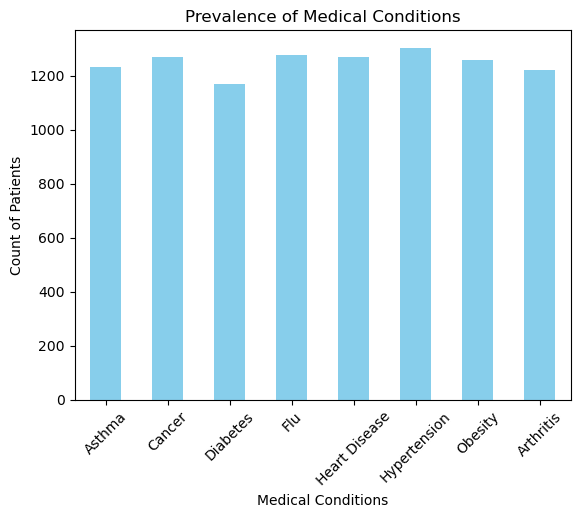

In [36]:
import matplotlib.pyplot as plt

# Plotting the count of each medical condition
condition_counts = data_encoded[['Asthma', 'Cancer', 'Diabetes', 'Flu', 'Heart Disease', 'Hypertension', 'Obesity', 'Arthritis']].sum()
condition_counts.plot(kind='bar', color='skyblue')

# Adding title and labels for better understanding
plt.title('Prevalence of Medical Conditions')
plt.xlabel('Medical Conditions')
plt.ylabel('Count of Patients')
plt.xticks(rotation=45)
plt.show()

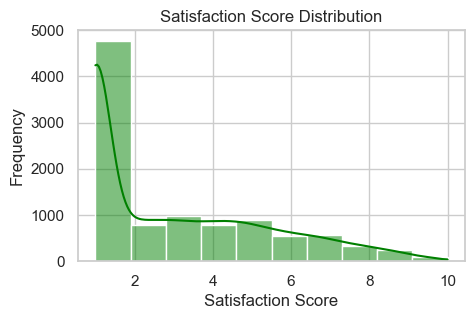

In [44]:
# Satisfaction Score Distribution
plt.figure(figsize=(5, 3))
sns.histplot(df['Satisfaction Score'], bins=10, kde=True, color='green')
plt.title('Satisfaction Score Distribution')
plt.xlabel('Satisfaction Score')
plt.ylabel('Frequency')
plt.show()

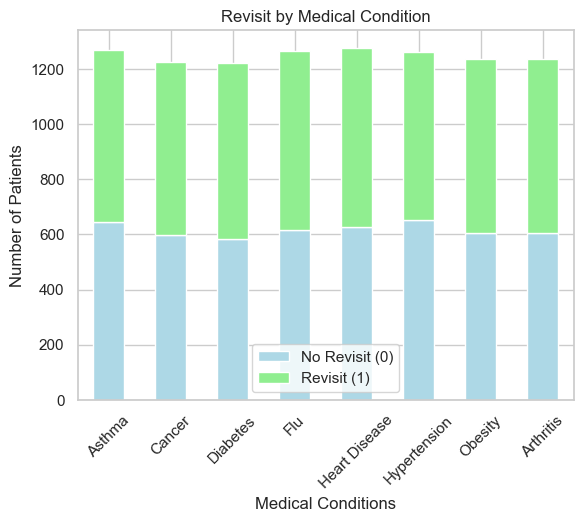

In [51]:
# Revisit Rates by Condition
# Group data by medical condition and calculate the sum of Revisit Flag (1 = Revisit, 0 = No Revisit)
revisit_by_condition = data_encoded.groupby(['Revisit Flag'])[['Asthma', 'Cancer', 'Diabetes', 'Flu', 'Heart Disease', 'Hypertension', 'Obesity', 'Arthritis']].sum()

# Step 3: Plot the data
revisit_by_condition.T.plot(kind='bar', stacked=True, color=['lightblue', 'lightgreen'])

# Add titles and labels
plt.title('Revisit by Medical Condition')
plt.xlabel('Medical Conditions')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.legend(['No Revisit (0)', 'Revisit (1)'])
plt.show()

##### Revisit Rates by Medical Condition

In [82]:
import pandas as pd

data = pd.read_csv('synthetic_healthcare_data.csv')

C:\Users\Mr. otegbola\AppData\Local\Temp\ipykernel_5072\3371585953.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revisit_rates.index, y=revisit_rates.values, palette="viridis")


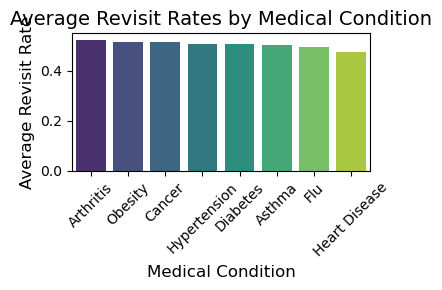

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping data by Medical Condition and calculating average Revisit Rate
revisit_rates = data.groupby('Medical Condition')['Revisit Flag'].mean().sort_values(ascending=False)

# Plotting the results
plt.figure(figsize=(4, 3))
sns.barplot(x=revisit_rates.index, y=revisit_rates.values, palette="viridis")
plt.title('Average Revisit Rates by Medical Condition', fontsize=14)
plt.xlabel('Medical Condition', fontsize=12)
plt.ylabel('Average Revisit Rate', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
# Save the dataset to a CSV file
data.to_csv('synthetic_healthcare_data.csv', index=False)


In [11]:
# Reload the dataset from the CSV file
data = pd.read_csv('synthetic_healthcare_data.csv')


#### Satisfaction Score by Age Group

C:\Users\Mr. otegbola\AppData\Local\Temp\ipykernel_5072\2540081353.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Age Group', y='Satisfaction Score', palette='coolwarm')


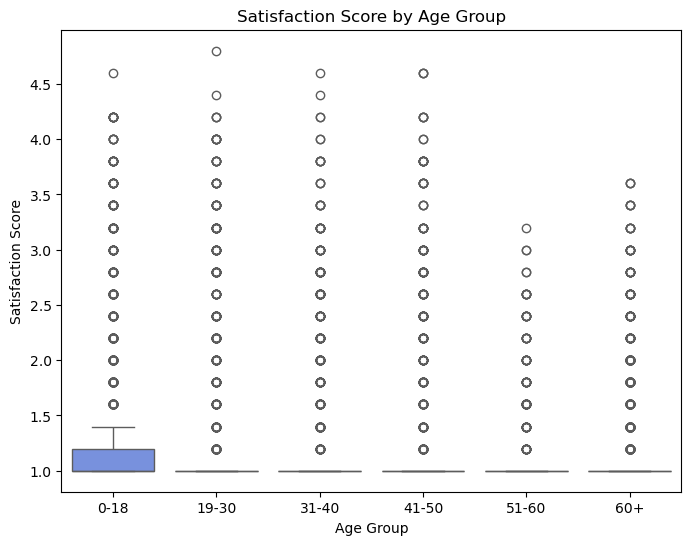

In [37]:
# Creating age groups
bins = [0, 18, 30, 40, 50, 60, 100]  # Customize age groups based on your data
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '60+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Plotting
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Age Group', y='Satisfaction Score', palette='coolwarm')
plt.title('Satisfaction Score by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Satisfaction Score')
plt.show()


#### Correlation between Billing Amount and Length of Stay

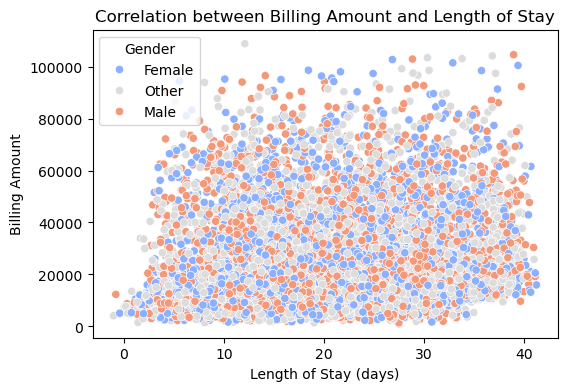

In [39]:
# Plotting the correlation
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='Length of Stay', y='Billing Amount', hue='Gender', palette='coolwarm')
plt.title('Correlation between Billing Amount and Length of Stay')
plt.xlabel('Length of Stay (days)')
plt.ylabel('Billing Amount')
plt.show()


#### Monthly Trends in Lenghth of Stay and Billing Amount

<Figure size 1000x600 with 0 Axes>

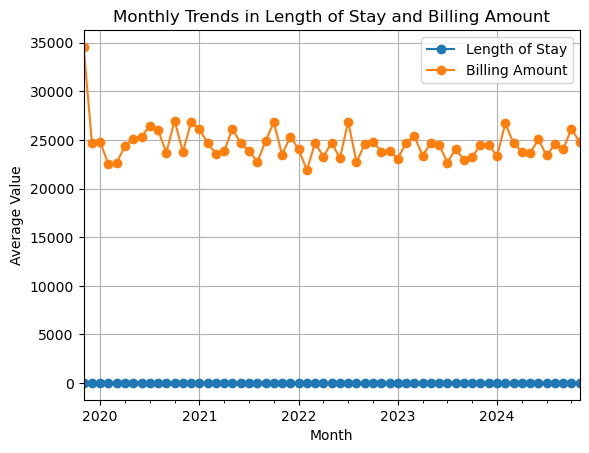

In [40]:
# Convert 'Date of Admission' to datetime format
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])

# Group by 'Date of Admission' and calculate mean for length of stay and billing amount
df['Month'] = df['Date of Admission'].dt.to_period('M')
monthly_trends = df.groupby('Month')[['Length of Stay', 'Billing Amount']].mean()

# Plotting the trends
plt.figure(figsize=(10, 6))
monthly_trends.plot(kind='line', marker='o')
plt.title('Monthly Trends in Length of Stay and Billing Amount')
plt.xlabel('Month')
plt.ylabel('Average Value')
plt.legend(['Length of Stay', 'Billing Amount'])
plt.grid(True)
plt.show()

#### I would now Introduce Skewness to Length of Stay
In this case, I’ll introduce skewness to the Length of Stay data, which is common in healthcare data where most patients have short stays, but a few might have long stays (e.g., long-term patients).

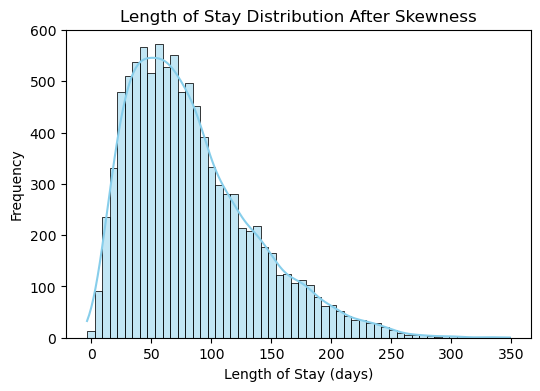

In [42]:
# Skewness Introduction
import numpy as np
import pandas as pd

# Add positive skew to Length of Stay
skew_factor = 2  # The higher this value, the more skewed the data will be
df['Length of Stay'] = df['Length of Stay'] * (1 + np.random.rand(len(df)) * skew_factor)

# Check the distribution of Length of Stay after skewness
plt.figure(figsize=(6, 4))
sns.histplot(df['Length of Stay'], kde=True, color='skyblue')
plt.title('Length of Stay Distribution After Skewness')
plt.xlabel('Length of Stay (days)')
plt.ylabel('Frequency')
plt.show()

##### Justification:
##### I introduced skewness to the Length of Stay variable to reflect the real-world distribution where most patients have short stays, but a small portion have significantly longer stays. This simulates the typical hospital stay distribution and is useful for modeling long-tail data."

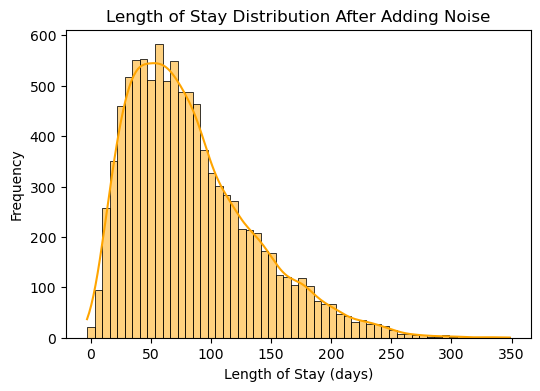

In [43]:
# Add random noise (Gaussian noise) to simulate chaos
noise = np.random.normal(0, 1, size=len(df))  # Mean 0, Std dev 1
df['Length of Stay'] = df['Length of Stay'] + noise

# Check the distribution of Length of Stay after noise
plt.figure(figsize=(6, 4))
sns.histplot(df['Length of Stay'], kde=True, color='orange')
plt.title('Length of Stay Distribution After Adding Noise')
plt.xlabel('Length of Stay (days)')
plt.ylabel('Frequency')
plt.show()

##### Justification:
##### Noise was added to the Length of Stay to simulate real-world data inconsistencies. Healthcare data is often noisy due to factors like inaccurate reporting or incomplete information. By adding noise, I can assess how robust my models and analysis are when faced with such imperfections

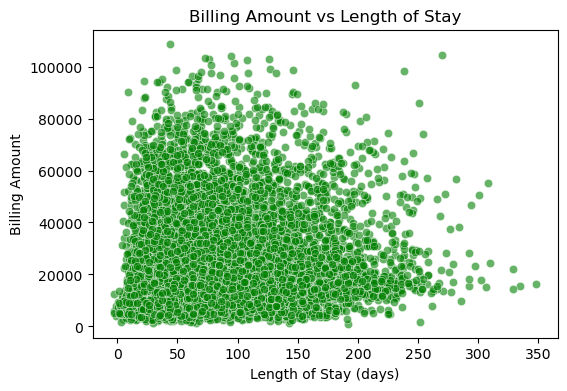

                Length of Stay  Billing Amount
Length of Stay        1.000000        0.077784
Billing Amount        0.077784        1.000000


In [44]:
# 

plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='Length of Stay', y='Billing Amount', color='green', alpha=0.6)
plt.title('Billing Amount vs Length of Stay')
plt.xlabel('Length of Stay (days)')
plt.ylabel('Billing Amount')
plt.show()

# Check correlation after noise/skewness
correlation = df[['Length of Stay', 'Billing Amount']].corr()
print(correlation)

##### This scatterplot shows the relationship between Length of Stay and Billing Amount after introducing skewness and noise. By visualizing this, I can observe how the introduced chaos and skewness impact the relationship between these two variables.

In [48]:
import pandas as pd
df.to_csv('synthetic_healthcare_data.csv', index=False)


In [49]:
from IPython.display import FileLink

# Create a downloadable link for the file
FileLink(r'synthetic_healthcare_data.csv')


C:\Users\Mr. otegbola\synthetic_healthcare_data.csv

In [50]:
import pandas as pd

# Save the DataFrame to a CSV file with appropriate encoding and delimiter
df.to_csv('synthetic_healthcare_data.csv', index=False, encoding='utf-8-sig', sep=',')


In [51]:
from IPython.display import FileLink

# Create a downloadable link for the file
FileLink(r'synthetic_healthcare_data.csv')


C:\Users\Mr. otegbola\synthetic_healthcare_data.csv